In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('player_stats.csv')

In [100]:
df.head()

,Unnamed: 0,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,total_overs_bowled,total_wickets,total_runs_given,highest_runs_given,total_orangecaps,total_purplecaps,total_player_of_series,batting_average,strike_rate
0,0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,59,1349,0,7,137,42,662,1326,7,91,38,46,8,359,39,0,0,0,35.500000,101.734540
1,1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,92,2435,2,11,248,106,893,1954,5,158,76,0,0,0,0,0,0,0,32.039474,124.616172
2,2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia,10,91,0,0,5,2,69,129,4,28,4,0,0,0,0,0,0,0,22.750000,70.542636
3,3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia,64,1322,0,5,90,60,423,1099,8,71,32,53,5,467,36,0,0,0,41.312500,120.291174
4,4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan,8,64,0,0,7,2,51,84,0,16,7,10,2,61,28,0,0,0,9.142857,76.190476


In [101]:
n = df.isnull().mean()

In [102]:
pd.DataFrame(n, columns=['missing']).sort_values(by='missing',ascending=False).style.background_gradient(cmap=r'rainbow')

,missing
Bowling_Skill,0.183556
DOB,0.099426
Batting_Hand,0.099426
Unnamed: 0,0.000000
total_ducks,0.000000
batting_average,0.000000
total_player_of_series,0.000000
total_purplecaps,0.000000
total_orangecaps,0.000000
highest_runs_given,0.000000


plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df.isnull(), cmap='viridis' , yticklabels=False)

In [103]:
df.drop('DOB' , axis = 1 , inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              523 non-null    int64  
 1   Player_Id               523 non-null    int64  
 2   Player_Name             523 non-null    object 
 3   Batting_Hand            471 non-null    object 
 4   Bowling_Skill           427 non-null    object 
 5   Country                 523 non-null    object 
 6   total_matches           523 non-null    int64  
 7   total_runs              523 non-null    int64  
 8   centuries               523 non-null    int64  
 9   half_centuries          523 non-null    int64  
 10  total_fours             523 non-null    int64  
 11  total_sixes             523 non-null    int64  
 12  total_dotballs          523 non-null    int64  
 13  total_balls_faced       523 non-null    int64  
 14  total_ducks             523 non-null    in

In [105]:
df['Bowling_Skill'].mode()[0]

'Right-arm medium'

In [106]:
df['Bowling_Skill'] = df['Bowling_Skill'].fillna(df['Bowling_Skill'].mode()[0])

In [107]:
df.isnull().sum()

Unnamed: 0                 0
Player_Id                  0
Player_Name                0
Batting_Hand              52
Bowling_Skill              0
Country                    0
total_matches              0
total_runs                 0
centuries                  0
half_centuries             0
total_fours                0
total_sixes                0
total_dotballs             0
total_balls_faced          0
total_ducks                0
best_score                 0
total_outs                 0
total_overs_bowled         0
total_wickets              0
total_runs_given           0
highest_runs_given         0
total_orangecaps           0
total_purplecaps           0
total_player_of_series     0
batting_average            0
strike_rate                0
dtype: int64

In [108]:
df['Batting_Hand'].mode()

0    Right_Hand
dtype: object

In [109]:
df['Batting_Hand'] = df['Batting_Hand'].fillna(df['Batting_Hand'].mode()[0])

In [110]:
df.isnull().sum()

Unnamed: 0                0
Player_Id                 0
Player_Name               0
Batting_Hand              0
Bowling_Skill             0
Country                   0
total_matches             0
total_runs                0
centuries                 0
half_centuries            0
total_fours               0
total_sixes               0
total_dotballs            0
total_balls_faced         0
total_ducks               0
best_score                0
total_outs                0
total_overs_bowled        0
total_wickets             0
total_runs_given          0
highest_runs_given        0
total_orangecaps          0
total_purplecaps          0
total_player_of_series    0
batting_average           0
strike_rate               0
dtype: int64

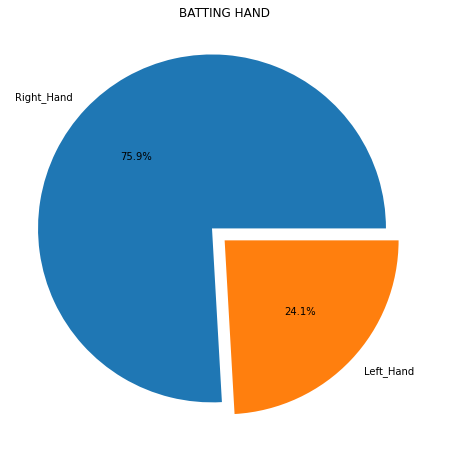

In [111]:
x = df['Batting_Hand'].value_counts()
plt.rcParams['figure.figsize'] = (8,8)
plt.pie(x , labels=x.index , autopct="%1.1f%%" , explode=[0.1,0])
plt.title('BATTING HAND')
plt.show()

In [112]:
y = df['Bowling_Skill'].value_counts().head(5)

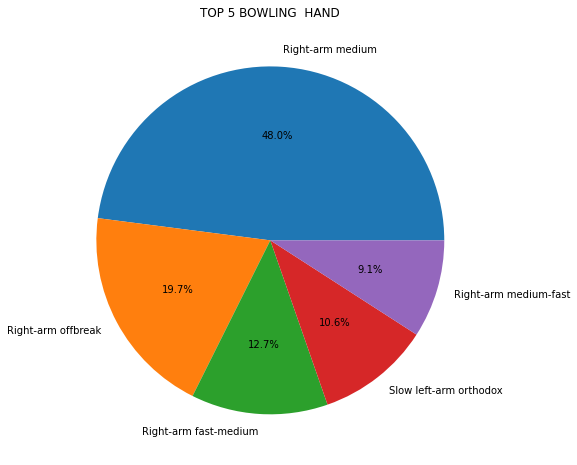

In [113]:
plt.rcParams['figure.figsize'] = (8,8)
plt.pie(y , labels=y.index , autopct="%1.1f%%")
plt.title('TOP 5 BOWLING  HAND')
plt.show()

In [114]:
z = df['Country'].value_counts().sort_values(ascending=False).head()

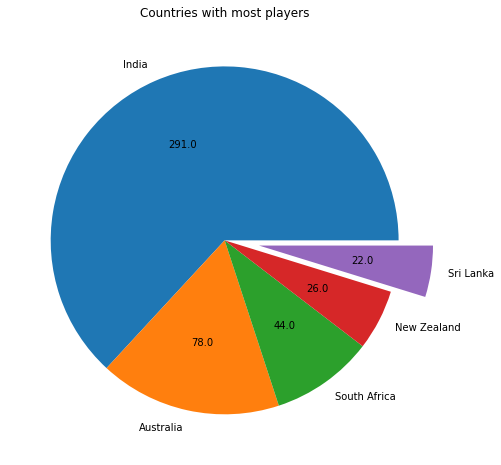

In [115]:
def cal(val):
  n = np.round(val/100*z.sum())
  return n
plt.rcParams['figure.figsize'] = (8,8)
plt.pie(z , labels=z.index , autopct=cal , explode = [ 0,0,0,0,0.2])
plt.title('Countries with most players')
plt.show()

In [116]:
df[['Player_Name' , 'total_matches' ]].sort_values(by='total_matches' , ascending=False).head(5).style.background_gradient(cmap='viridis')

,Player_Name,total_matches
20,SK Raina,146
19,MS Dhoni,142
56,RG Sharma,142
7,V Kohli,138
87,KD Karthik,138


In [117]:
df[['Player_Name' , 'total_runs' ]].sort_values(by='total_runs' , ascending=False).head(5).style.background_gradient(cmap='bone_r')

,Player_Name,total_runs
20,SK Raina,4106
7,V Kohli,4105
56,RG Sharma,3874
39,G Gambhir,3634
161,CH Gayle,3447


In [118]:
df[['Player_Name' , 'Country' , 'centuries' ]].sort_values(by='centuries' , ascending=False).head(5).style.background_gradient(cmap='Set2')

,Player_Name,Country,centuries
161,CH Gayle,West Indies,5
7,V Kohli,India,4
109,AB de Villiers,South Africa,3
40,V Sehwag,India,2
1,BB McCullum,New Zealand,2


In [119]:
df[['Player_Name' , 'Country' , 'half_centuries' ]].sort_values(by='half_centuries' , ascending=False).head(5).style.background_gradient(cmap='Set2')

,Player_Name,Country,half_centuries
186,DA Warner,Australia,32
39,G Gambhir,India,31
56,RG Sharma,India,29
20,SK Raina,India,28
7,V Kohli,India,27


In [120]:
categorical_data = [ data for data in df.columns if df[data].dtypes=='O']
print(categorical_data)
print(f'numbers of categotical values : {len(categorical_data)}')

['Player_Name', 'Batting_Hand', 'Bowling_Skill', 'Country']
numbers of categotical values : 4


In [121]:
df[categorical_data].head(4)

,Player_Name,Batting_Hand,Bowling_Skill,Country
0,SC Ganguly,Left_Hand,Right-arm medium,India
1,BB McCullum,Right_Hand,Right-arm medium,New Zealand
2,RT Ponting,Right_Hand,Right-arm medium,Australia
3,DJ Hussey,Right_Hand,Right-arm offbreak,Australia


In [122]:
df.dtypes.value_counts()

int64      20
object      4
float64     2
dtype: int64

In [123]:
numerical_data = [ data for data in df.columns if df[data].dtypes !='O']
print(numerical_data)
print(f'numbers of numerical values : {len(categorical_data)}')
print('')
print('')
df[numerical_data].head(3)

['Unnamed: 0', 'Player_Id', 'total_matches', 'total_runs', 'centuries', 'half_centuries', 'total_fours', 'total_sixes', 'total_dotballs', 'total_balls_faced', 'total_ducks', 'best_score', 'total_outs', 'total_overs_bowled', 'total_wickets', 'total_runs_given', 'highest_runs_given', 'total_orangecaps', 'total_purplecaps', 'total_player_of_series', 'batting_average', 'strike_rate']
numbers of numerical values : 4




,Unnamed: 0,Player_Id,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,total_overs_bowled,total_wickets,total_runs_given,highest_runs_given,total_orangecaps,total_purplecaps,total_player_of_series,batting_average,strike_rate
0,0,1,59,1349,0,7,137,42,662,1326,7,91,38,46,8,359,39,0,0,0,35.500000,101.734540
1,1,2,92,2435,2,11,248,106,893,1954,5,158,76,0,0,0,0,0,0,0,32.039474,124.616172
2,2,3,10,91,0,0,5,2,69,129,4,28,4,0,0,0,0,0,0,0,22.750000,70.542636


In [124]:
df['total_runs'].dtypes

dtype('int64')

In [125]:
df.corr()

,Unnamed: 0,Player_Id,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,total_overs_bowled,total_wickets,total_runs_given,highest_runs_given,total_orangecaps,total_purplecaps,total_player_of_series,batting_average,strike_rate
Unnamed: 0,1.000000,1.000000,-0.526391,-0.414801,-0.196126,-0.340059,-0.410499,-0.353177,-0.442715,-0.431917,-0.306994,-0.464241,-0.474187,-0.289390,-0.268257,-0.290209,-0.158173,-0.133943,-0.076954,-0.086540,-0.362245,-0.516707
Player_Id,1.000000,1.000000,-0.526388,-0.414795,-0.196123,-0.340053,-0.410493,-0.353172,-0.442708,-0.431911,-0.306996,-0.464244,-0.474181,-0.289391,-0.268258,-0.290211,-0.158195,-0.133941,-0.076953,-0.086539,-0.362253,-0.516726
total_matches,-0.526391,-0.526388,1.000000,0.788300,0.401264,0.673771,0.757126,0.717544,0.788008,0.795860,0.635095,0.612629,0.849058,0.608399,0.574240,0.607162,0.221643,0.236776,0.200898,0.208407,0.432322,0.395203
total_runs,-0.414801,-0.414795,0.788300,1.000000,0.635953,0.950602,0.982324,0.919816,0.983760,0.995314,0.063568,0.769078,0.965071,0.085705,0.061651,0.088812,-0.078822,0.435901,0.003756,0.304266,0.526071,0.366480
centuries,-0.196126,-0.196123,0.401264,0.635953,1.000000,0.629893,0.618354,0.723635,0.599447,0.596577,-0.019187,0.541550,0.544731,0.004238,-0.002078,0.003648,-0.028132,0.589536,-0.023313,0.492770,0.296146,0.189102
half_centuries,-0.340059,-0.340053,0.673771,0.950602,0.629893,1.000000,0.952520,0.852790,0.928893,0.943044,0.001271,0.689797,0.879060,0.001175,-0.016817,0.003008,-0.101688,0.468209,-0.017857,0.281489,0.462456,0.291570
total_fours,-0.410499,-0.410493,0.757126,0.982324,0.618354,0.952520,1.000000,0.855276,0.982693,0.983855,0.046974,0.759982,0.950792,0.049236,0.029086,0.051043,-0.108198,0.436512,-0.004046,0.307324,0.507886,0.350461
total_sixes,-0.353177,-0.353172,0.717544,0.919816,0.723635,0.852790,0.855276,1.000000,0.879288,0.888347,0.050507,0.725474,0.881481,0.124676,0.103021,0.130180,-0.014548,0.483593,0.006347,0.371012,0.474585,0.356780
total_dotballs,-0.442715,-0.442708,0.788008,0.983760,0.599447,0.928893,0.982693,0.879288,1.000000,0.992766,0.074244,0.781124,0.967515,0.092388,0.067312,0.095006,-0.087107,0.430533,0.009273,0.301327,0.526403,0.361588
total_balls_faced,-0.431917,-0.431911,0.795860,0.995314,0.596577,0.943044,0.983855,0.888347,0.992766,1.000000,0.074128,0.769799,0.968004,0.089850,0.064093,0.092552,-0.084319,0.416610,0.006614,0.283628,0.531361,0.362983


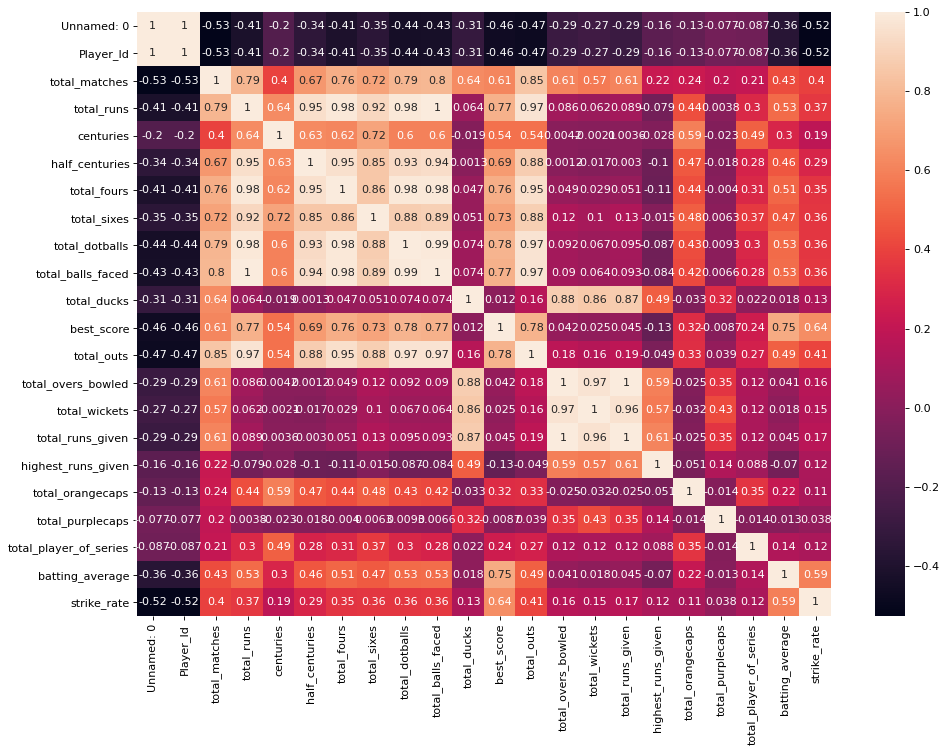

In [126]:
plt.figure(figsize=(14,10),dpi = 80)
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [127]:
df.columns

Index(['Unnamed: 0', 'Player_Id', 'Player_Name', 'Batting_Hand',
       'Bowling_Skill', 'Country', 'total_matches', 'total_runs', 'centuries',
       'half_centuries', 'total_fours', 'total_sixes', 'total_dotballs',
       'total_balls_faced', 'total_ducks', 'best_score', 'total_outs',
       'total_overs_bowled', 'total_wickets', 'total_runs_given',
       'highest_runs_given', 'total_orangecaps', 'total_purplecaps',
       'total_player_of_series', 'batting_average', 'strike_rate'],
      dtype='object')

In [128]:
df1 = df.copy()

In [129]:
df1.drop(['Unnamed: 0', 'Player_Id','total_overs_bowled', 'total_wickets', 'total_runs_given',
       'highest_runs_given', 'total_orangecaps', 'total_purplecaps',
       'total_player_of_series',  'strike_rate'] , axis=1 , inplace=True)

In [130]:
df1.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average
0,SC Ganguly,Left_Hand,Right-arm medium,India,59,1349,0,7,137,42,662,1326,7,91,38,35.500000
1,BB McCullum,Right_Hand,Right-arm medium,New Zealand,92,2435,2,11,248,106,893,1954,5,158,76,32.039474
2,RT Ponting,Right_Hand,Right-arm medium,Australia,10,91,0,0,5,2,69,129,4,28,4,22.750000
3,DJ Hussey,Right_Hand,Right-arm offbreak,Australia,64,1322,0,5,90,60,423,1099,8,71,32,41.312500
4,Mohammad Hafeez,Right_Hand,Right-arm offbreak,Pakistan,8,64,0,0,7,2,51,84,0,16,7,9.142857


In [131]:
 df1['Country'].value_counts().sort_values(ascending=False)

India           291
Australia        78
South Africa     44
New Zealand      26
Sri Lanka        22
West Indies      20
England          18
Pakistan         15
Bangladesh        5
Zimbabwea         3
Netherlands       1
Name: Country, dtype: int64

In [132]:
# df2 = pd.get_dummies(df['Country'],drop_first=True)

df1['Country'] = df1['Country'].replace(['England' , 'Pakistan','Bangladesh','Zimbabwea'] , 'other')

In [133]:
df1['Country'] = df1['Country'].replace(['England' , 'Pakistan','Bangladesh','Zimbabwea' , 'Netherlands'] , 'other')

In [134]:
df1.head(6)


,Player_Name,Batting_Hand,Bowling_Skill,Country,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average
0,SC Ganguly,Left_Hand,Right-arm medium,India,59,1349,0,7,137,42,662,1326,7,91,38,35.500000
1,BB McCullum,Right_Hand,Right-arm medium,New Zealand,92,2435,2,11,248,106,893,1954,5,158,76,32.039474
2,RT Ponting,Right_Hand,Right-arm medium,Australia,10,91,0,0,5,2,69,129,4,28,4,22.750000
3,DJ Hussey,Right_Hand,Right-arm offbreak,Australia,64,1322,0,5,90,60,423,1099,8,71,32,41.312500
4,Mohammad Hafeez,Right_Hand,Right-arm offbreak,other,8,64,0,0,7,2,51,84,0,16,7,9.142857
5,R Dravid,Right_Hand,Right-arm offbreak,India,89,2170,0,11,268,28,819,1917,10,75,56,38.750000


df1.head(6)

In [135]:
 df1['Country'].value_counts().sort_values(ascending=False).head(10)

India           291
Australia        78
South Africa     44
other            42
New Zealand      26
Sri Lanka        22
West Indies      20
Name: Country, dtype: int64

In [136]:
df2 = pd.get_dummies(df1['Country'],drop_first=True)

In [137]:
df1 = pd.concat([df1 , df2] , axis=1)
  


In [138]:
df1.drop('Country' , axis=1 , inplace=True)

In [139]:
df1.head(2)

,Player_Name,Batting_Hand,Bowling_Skill,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other
0,SC Ganguly,Left_Hand,Right-arm medium,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0
1,BB McCullum,Right_Hand,Right-arm medium,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0


In [140]:
df['Batting_Hand'].value_counts().sort_values(ascending=False)

Right_Hand    397
Left_Hand     126
Name: Batting_Hand, dtype: int64

In [141]:
df1['Batting_Hand'] = df1['Batting_Hand'].apply(lambda x : 0 if x =='Right_Hand' else 1) 

RIGHT HAND 0 , LEFT HAND 1






In [142]:
df1.head()

,Player_Name,Batting_Hand,Bowling_Skill,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other
0,SC Ganguly,1,Right-arm medium,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0
1,BB McCullum,0,Right-arm medium,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0
2,RT Ponting,0,Right-arm medium,10,91,0,0,5,2,69,129,4,28,4,22.750000,0,0,0,0,0,0
3,DJ Hussey,0,Right-arm offbreak,64,1322,0,5,90,60,423,1099,8,71,32,41.312500,0,0,0,0,0,0
4,Mohammad Hafeez,0,Right-arm offbreak,8,64,0,0,7,2,51,84,0,16,7,9.142857,0,0,0,0,0,1


In [143]:
df.shape

(523, 26)

In [144]:
df['Bowling_Skill'].value_counts().sort_values(ascending=False)

Right-arm medium          200
Right-arm offbreak         82
Right-arm fast-medium      53
Slow left-arm orthodox     44
Right-arm medium-fast      38
Legbreak                   24
Legbreak googly            21
Right-arm fast             20
Left-arm fast-medium       13
Left-arm medium            11
Left-arm medium-fast        8
Slow left-arm chinaman      5
Left-arm fast               3
Right-arm bowler            1
Name: Bowling_Skill, dtype: int64

In [145]:
df['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Right-arm fast-medium',
       'Legbreak googly', 'Right-arm medium-fast', 'Left-arm fast-medium',
       'Slow left-arm orthodox', 'Slow left-arm chinaman',
       'Left-arm medium-fast', 'Legbreak', 'Right-arm fast',
       'Right-arm bowler', 'Left-arm medium', 'Left-arm fast'],
      dtype=object)

In [146]:
df1['Bowling_Skill'] = df1['Bowling_Skill'].replace(['Right-arm fast' , 'Left-arm fast-medium' ,'Left-arm medium', 'Left-arm medium-fast','Left-arm fast','Slow left-arm chinaman','Right-arm bowler'],'other_bowling')

In [147]:
df1['Bowling_Skill'].value_counts().sort_values(ascending=False)

Right-arm medium          200
Right-arm offbreak         82
other_bowling              61
Right-arm fast-medium      53
Slow left-arm orthodox     44
Right-arm medium-fast      38
Legbreak                   24
Legbreak googly            21
Name: Bowling_Skill, dtype: int64

In [148]:
df1.head()

,Player_Name,Batting_Hand,Bowling_Skill,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other
0,SC Ganguly,1,Right-arm medium,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0
1,BB McCullum,0,Right-arm medium,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0
2,RT Ponting,0,Right-arm medium,10,91,0,0,5,2,69,129,4,28,4,22.750000,0,0,0,0,0,0
3,DJ Hussey,0,Right-arm offbreak,64,1322,0,5,90,60,423,1099,8,71,32,41.312500,0,0,0,0,0,0
4,Mohammad Hafeez,0,Right-arm offbreak,8,64,0,0,7,2,51,84,0,16,7,9.142857,0,0,0,0,0,1


In [149]:
df3 = pd.get_dummies(df1['Bowling_Skill'],drop_first=True)

In [150]:
df1 = pd.concat([df1.drop('Bowling_Skill',axis=1) , df3] , axis=1)

In [151]:
df1.head(2)

,Player_Name,Batting_Hand,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other,Legbreak googly,Right-arm fast-medium,Right-arm medium,Right-arm medium-fast,Right-arm offbreak,Slow left-arm orthodox,other_bowling
0,SC Ganguly,1,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0,0,0,1,0,0,0,0
1,BB McCullum,0,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0,0,0,1,0,0,0,0


In [152]:
df1.shape

(523, 27)

In [153]:
df1.drop('Player_Name',axis=1 , inplace=True)

In [154]:
df1.dtypes

Batting_Hand                int64
total_matches               int64
total_runs                  int64
centuries                   int64
half_centuries              int64
total_fours                 int64
total_sixes                 int64
total_dotballs              int64
total_balls_faced           int64
total_ducks                 int64
best_score                  int64
total_outs                  int64
batting_average           float64
India                       uint8
New Zealand                 uint8
South Africa                uint8
Sri Lanka                   uint8
West Indies                 uint8
other                       uint8
Legbreak googly             uint8
Right-arm fast-medium       uint8
Right-arm medium            uint8
Right-arm medium-fast       uint8
Right-arm offbreak          uint8
Slow left-arm orthodox      uint8
other_bowling               uint8
dtype: object

In [155]:
df1.head(2)

,Batting_Hand,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other,Legbreak googly,Right-arm fast-medium,Right-arm medium,Right-arm medium-fast,Right-arm offbreak,Slow left-arm orthodox,other_bowling
0,1,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0,0,0,1,0,0,0,0


In [156]:
X = df1.drop('Batting_Hand' , axis = 1)
y = df1[['Batting_Hand']]

In [157]:
X.head()

,total_matches,total_runs,centuries,half_centuries,total_fours,total_sixes,total_dotballs,total_balls_faced,total_ducks,best_score,total_outs,batting_average,India,New Zealand,South Africa,Sri Lanka,West Indies,other,Legbreak googly,Right-arm fast-medium,Right-arm medium,Right-arm medium-fast,Right-arm offbreak,Slow left-arm orthodox,other_bowling
0,59,1349,0,7,137,42,662,1326,7,91,38,35.500000,1,0,0,0,0,0,0,0,1,0,0,0,0
1,92,2435,2,11,248,106,893,1954,5,158,76,32.039474,0,1,0,0,0,0,0,0,1,0,0,0,0
2,10,91,0,0,5,2,69,129,4,28,4,22.750000,0,0,0,0,0,0,0,0,1,0,0,0,0
3,64,1322,0,5,90,60,423,1099,8,71,32,41.312500,0,0,0,0,0,0,0,0,0,0,1,0,0
4,8,64,0,0,7,2,51,84,0,16,7,9.142857,0,0,0,0,0,1,0,0,0,0,1,0,0


In [158]:
y.head()

,Batting_Hand
0,1
1,0
2,0
3,0
4,0


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [161]:
X_train.shape

(470, 25)

In [162]:
X_test.shape

(53, 25)

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
X_train.shape

(470, 25)

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
model = LogisticRegression()
model.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
model.score(X_test,y_test)

0.8301886792452831

In [169]:
y_pred = model.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [171]:
accuracy_score(y_test,y_pred)

0.8301886792452831

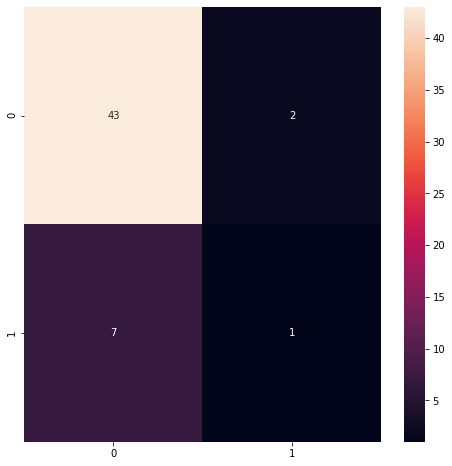

In [172]:
sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True)

In [173]:
from sklearn.svm import SVC

In [174]:
m1 = SVC()

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param = {'C' : [1,0.1,0.01,0.001,1.1,],
         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
         
         }

In [177]:
gd = GridSearchCV(estimator= m1,param_grid=param,scoring='accuracy',cv=5)


In [178]:
gd.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 1.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [179]:
gd.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [180]:
gd.best_score_

0.7978723404255319

In [181]:
gd.score(X_test,y_test)

0.8301886792452831

In [182]:
y = gd.predict(X_test)

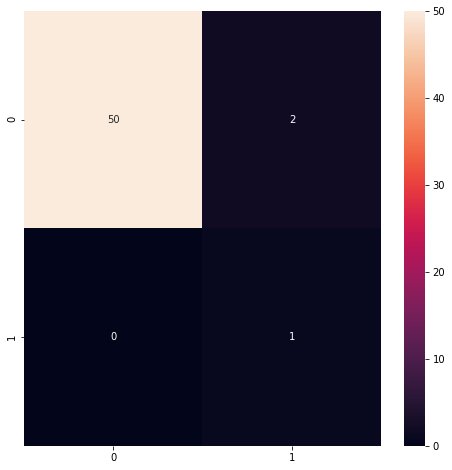

In [183]:
sns.heatmap(confusion_matrix(y,y_pred) , annot=True)

In [184]:
accuracy_score(y,y_test)

0.8301886792452831

In [185]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.00      0.00      0.00         8

    accuracy                           0.83        53
   macro avg       0.42      0.49      0.45        53
weighted avg       0.72      0.83      0.77        53



In [186]:
gd.score(X_test,y_test)

0.8301886792452831

In [187]:
# best_model = {
#     'svm' : {
#         'model' : SVC(gamma='auto'),
#         'param' : {
#             'C' : [1,10,100,1000,0.1],
#             'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']

#         }
#     }
# }

In [188]:
# best_model.items()

In [189]:
# s = []
# for model_name , params in best_model.items():
#   grid = GridSearchCV(estimator=params['model'] , param_grid=params['param'] , cv=3,)
#   grid.fit(X_train,y_train.values.ravel())
#   s.append({
#       'best_estimator' : model_name,
#       'score' : grid.best_score_,
#       'best_param' : grid.best_score_
#   })